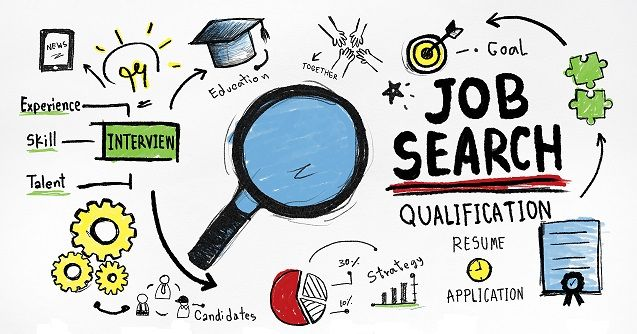

In [1]:
from IPython.display import Image, display

display(Image(filename=r"C:\Users\ADMIN\Documents\Moringa School\Phase 3\P3 Project\Images\Get Hired! #HireMe.jpeg"))

## Project Goal
The objective for this project is to build a machine learning model that predicts whether a job applicant is suitable for a particular role based on their background information. This predictive model will suport recruitment platforms and HR tech firms in streamlining candidate screening, reducing manual workload, and increasing the quality of the shortlisted candidates.

## Overview
This project analyzes job candidates' data to determine their suitability for a job role. The dataset, obtained from Kaggle, includes various candidate attributes suc as education, major, ryears of experience and skills. By applying classification algorithms and experimenting with different preprocessing techniques and model types( eg: logistic regression, decision trees, ensemble models), this analysis aims to develop a robust model that predicts suitability with high accuracy.

Key project activities include:
- Data cleaning and preprocessing
- Exploratory data analysis(EDA) to identify patterns
- Model development and evaluation
- Hyperparameter tuning and performance optimization

## 1. Business Understanding
Recruiting companies and HR tech startups face increasing challenges in efficiently screening high volumes of job applications. Manual resume screening is time consuming, inconsistet, and ofetn biased. Automating this step with a data-driven approach can drastically improve the speed and quality of candidate selection.

This analysis addresses the following business questions:
1. Can we build a reliable model that predicts candidate suitability based on resume attributes?
2. What candidate features(e.g., education,experience, skills) are most indicative of suitability?
3. How does model performance vary between different classification techniques?

By answering these questions, this project supports the development of smart hiring system that reduce time-to-hire, improve matching quality, and increase recruiter productivity.

## 2. Data Understanding
The dataset used for this project is the [HR Job Candidate Dataset](https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists?resource=download) from Kaggle. It contains information on job applicants including:

- **Candidate Features**: education level, major, university tier, years of experience, industry, gender, job roles, etc.
- **Target Variable**: (1 = Suitable, 0 = Not Suitable)

The dataset provided includes three CSV files:

- `aug_train.csv` — the training dataset with labeled examples, including the target variable.
- `aug_test.csv` — the test dataset without target labels, intended for evaluating the model's generalization ability.
- `sample_submission.csv` — a template file showing the expected submission format for predictions on the test set.

This indicates that the dataset is already pre-split. We will use `aug_train.csv` to train and validate our model, and generate final predictions on `aug_test.csv` for submission or evaluation.

Steps in Data Understanding:
1. Class Distribution: Determine whether the dataset is balanced in terms of suitable vs not suitable candidates, which informs our choice of metrics and model evaluation strategies.
2. Missing value analysis: Identify and address any missing values, especially in fields like education or experience.
3. Categorical Feature Encoding: Prepare categorical featuers(e.g., majors, universities) using appropriate encoding techniques such as One-Hot or Ordina Encoding.
4. Correlation: Investigate which features have the strongest relationship with the target variable.

## 3. Data Preparation
Loading the dataset

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training dataset
train_df = pd.read_csv("aug_train.csv")

# Display the first few rows
train_df.head()


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
